In [3]:
import pandas as pd

# Path to your Excel file
excel_file_path = 'C:\\Users\\nicol\\Desktop\\INF2178 A2\\INF2178_A2_data.xlsx'

# Load the data into a pandas DataFrame from the 'ChildCareCentres' sheet
dataframe = pd.read_excel(excel_file_path, sheet_name='ChildCareCentres')

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(dataframe.head())


   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency     600 MORRISH RD  M1C 4Y1    25   
3  Non Profit Agency  130 ADELAIDE ST W  M5H 3P5    10   
4  Non Profit Agency    1 FIRVALLEY CRT  M1L 1N8    20   

                    bldg_type                         BLDGNAME  IGSPACE  \
0    Public Elementary School     Seventh Street Public School        0   
1    Public Elementary School  North Preparatory Public School        0   
2  Catholic

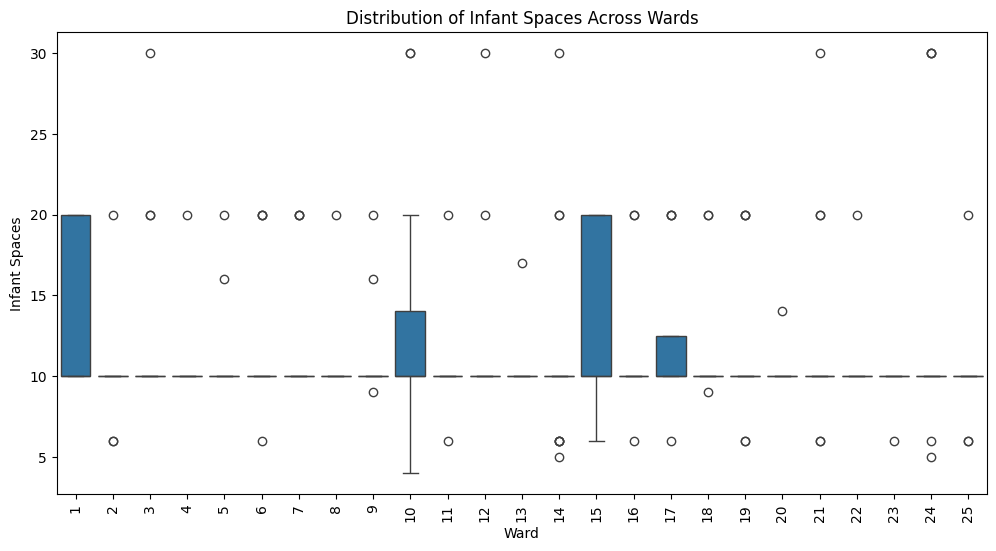

F-statistic: 0.6654479890294249, P-value: 0.8840927763051885


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Filter out rows where IGSPACE is zero
filtered_data = dataframe[dataframe['IGSPACE'] > 0]

# Visualize the data using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ward', y='IGSPACE', data=filtered_data)
plt.xticks(rotation=90)  # Rotate the ward labels for better readability
plt.title('Distribution of Infant Spaces Across Wards')
plt.xlabel('Ward')
plt.ylabel('Infant Spaces')
plt.show()

# Group data by ward and prepare for one-way ANOVA
groups = [group['IGSPACE'].values for _, group in filtered_data.groupby('ward')]

# Perform one-way ANOVA
anova_result = f_oneway(*groups)
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")


C:\Users\nicol\AppData\Local\Temp\ipykernel_6012\2337273733.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ward', y='TGSPACE', data=filtered_data_toddlers, palette="Set3")


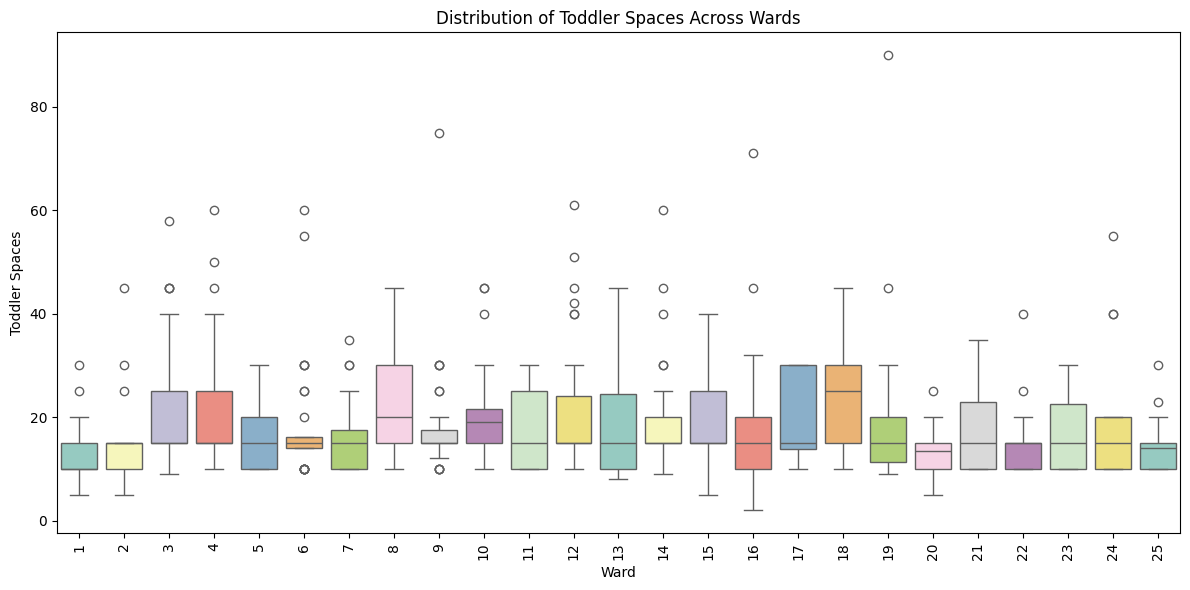

(1.8636523028119543, 0.007679191544081789)

In [5]:
# Import necessary libraries and variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


# Path to the Excel file
excel_file_path = 'C:\\Users\\nicol\\Desktop\\INF2178 A2\\INF2178_A2_data.xlsx'

# Load the dataset
child_care_data = pd.read_excel(excel_file_path, sheet_name='ChildCareCentres')

# Filter out rows where TGSPACE is zero, to focus on centers with toddler spaces
filtered_data_toddlers = child_care_data[child_care_data['TGSPACE'] > 0]

# Visualize the data using a boxplot for toddler spaces
plt.figure(figsize=(12, 6))
sns.boxplot(x='ward', y='TGSPACE', data=filtered_data_toddlers, palette="Set3")
plt.xticks(rotation=90)  # Rotate the ward labels for better readability
plt.title('Distribution of Toddler Spaces Across Wards')
plt.xlabel('Ward')
plt.ylabel('Toddler Spaces')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Group data by ward and prepare for ANOVA, focusing on toddler spaces this time
groups_toddlers = [group['TGSPACE'].values for _, group in filtered_data_toddlers.groupby('ward')]

# Perform one-way ANOVA for toddler spaces
anova_result_toddlers = f_oneway(*groups_toddlers)

# Display the ANOVA test result for toddler spaces
anova_result_toddlers_statistic = anova_result_toddlers.statistic
anova_result_toddlers_pvalue = anova_result_toddlers.pvalue

anova_result_toddlers_statistic, anova_result_toddlers_pvalue


In [8]:
!pip install statsmodels


In [10]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Convert 'ward' to a categorical variable for this analysis
child_care_data['ward'] = child_care_data['ward'].astype('category')

# Ensure 'subsidy' is treated as a categorical variable
child_care_data['subsidy'] = child_care_data['subsidy'].astype('category')

# Perform the two-way ANOVA
# Adjust 'TGSPACE' if analyzing a different age group's capacity
model = ols('TGSPACE ~ C(ward) + C(subsidy) + C(ward):C(subsidy)', data=child_care_data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results


,sum_sq,df,F,PR(>F)
C(ward),4215.142790,24.0,1.257867,1.824667e-01
C(subsidy),7011.545252,1.0,50.216608,2.575975e-12
C(ward):C(subsidy),2430.545035,24.0,0.725314,8.290083e-01
Residual,141441.159912,1013.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     N      Y  -5.5183   0.0 -7.0369 -3.9998   True
---------------------------------------------------


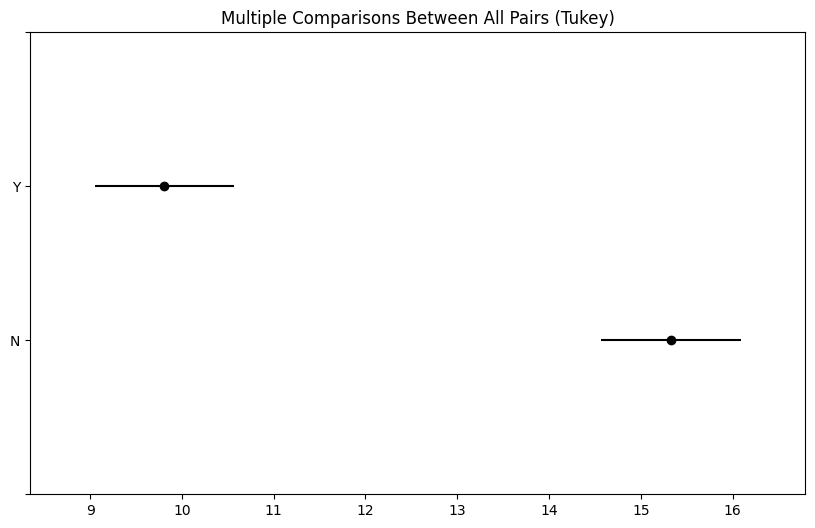

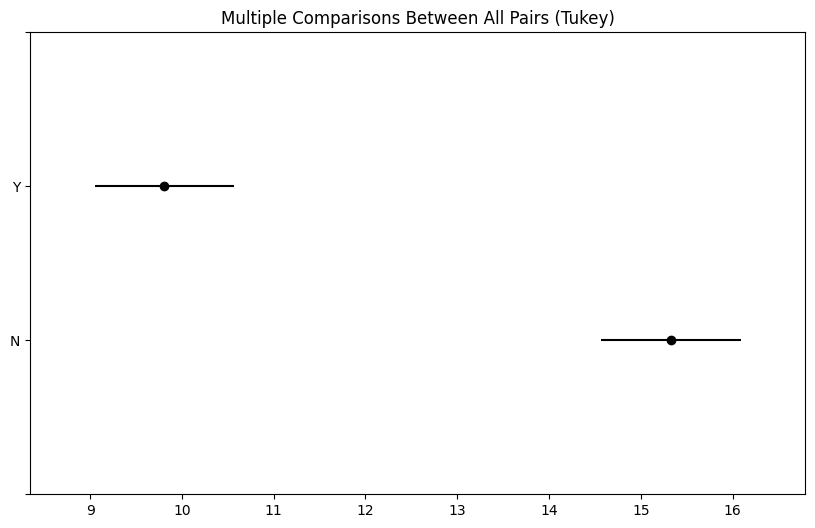

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 'subsidy' is a categorical variable
# Conduct Tukey's HSD test for the 'subsidy' factor
tukey_test = pairwise_tukeyhsd(endog=child_care_data['TGSPACE'], 
                               groups=child_care_data['subsidy'], 
                               alpha=0.05)

# Print the results
print(tukey_test)

# Visualize the results
tukey_test.plot_simultaneous()
